<a href="https://colab.research.google.com/github/Shreedevi-Byahatti/Class-84/blob/main/Predict_my_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Collection

Use Pandas to load the dataset from the folder

In [ ]:
import pandas as pd
file_id = '1rm-AAkYYVHcpUu4yLP-D1d2D7FETgD-P'
url = 'https://drive.google.com/uc?id={}'.format(file_id)
data = pd.read_csv(url)

### Data Processing

Display the first 5 rows of the dataset

In [ ]:
data.head()

,experience,test_score,interview_score,Salary
0,NaN,8.0,8.0,50000
1,NaN,5.0,4.0,22000
2,three,6.0,5.0,30000
3,five,9.0,9.0,55000
4,six,3.0,5.0,13000


Display summary information about the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       15 non-null     object 
 1   test_score       19 non-null     float64
 2   interview_score  19 non-null     float64
 3   Salary           20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 768.0+ bytes


Display basic statistics about the dataset

In [ ]:
data.describe()

,test_score,interview_score,Salary
count,19.000000,19.000000,20.000000
mean,5.447368,5.657895,30350.000000
std,2.832817,2.516902,19780.439567
min,1.000000,1.000000,500.000000
25%,3.000000,4.500000,12750.000000
50%,5.000000,6.000000,27500.000000
75%,8.000000,7.750000,48500.000000
max,9.000000,9.000000,60000.000000


Count missing values in each column

In [ ]:
data.isnull().sum()

experience         5
test_score         1
interview_score    1
Salary             0
dtype: int64

Count of each unique value in the 'experience' column

In [ ]:
data['experience'].value_counts()

three       2
five        2
six         2
ten         2
one         2
fifteen     1
thirteen    1
four        1
eleven      1
twelve      1
Name: experience, dtype: int64

### Data Formatting

In [ ]:
# Mapping of experience words to numerical values
ordinal_values = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
                  'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
                  'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fifteen': 15}

# Convert 'experience' column to numerical values using the mapping
data['experience'] = data['experience'].map(ordinal_values)

Handling missing values in 'Experience' column

In [ ]:
# Fill missing 'experience' values with the mean experience
mean_experience = data['experience'].mean()
data['experience'].fillna(mean_experience, inplace=True)

Handling missing values in 'Test Score' column

In [ ]:
# Fill missing 'test_score' values with the mean experience
mean_test_score = data['test_score'].mean()
data['test_score'].fillna(mean_test_score, inplace=True)

Handling missing values in 'Interview Score' column

In [ ]:
# Fill missing 'interview_score' values with the mean experience
mean_interview_score = data['interview_score'].mean()
data['interview_score'].fillna(mean_interview_score, inplace=True)

In [ ]:
# After handling missing values, display the first few rows of the cleaned data
data.head()

,experience,test_score,interview_score,Salary
0,7.0,8.0,8.0,50000
1,7.0,5.0,4.0,22000
2,3.0,6.0,5.0,30000
3,5.0,9.0,9.0,55000
4,6.0,3.0,5.0,13000


 Modules to create visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

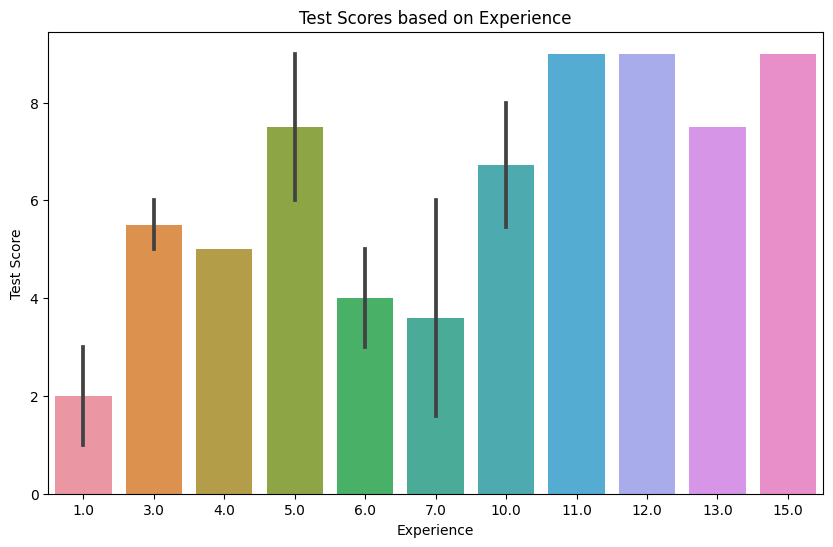

In [ ]:
# Create bar plot for Test Scores based on Experience
plt.figure(figsize=(10, 6))
sns.barplot(x=data['experience'], y=data['test_score'])
plt.title('Test Scores based on Experience')
plt.xlabel('Experience')
plt.ylabel('Test Score')
plt.show()

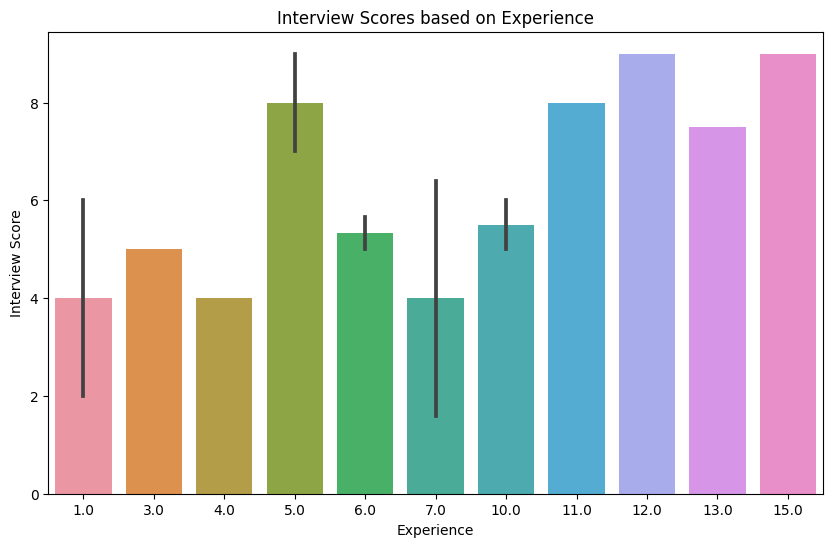

In [ ]:
# Create bar plot for Interview Scores based on Experience
plt.figure(figsize=(10, 6))
sns.barplot(x=data['experience'], y=data['interview_score'])
plt.title('Interview Scores based on Experience')
plt.xlabel('Experience')
plt.ylabel('Interview Score')
plt.show()

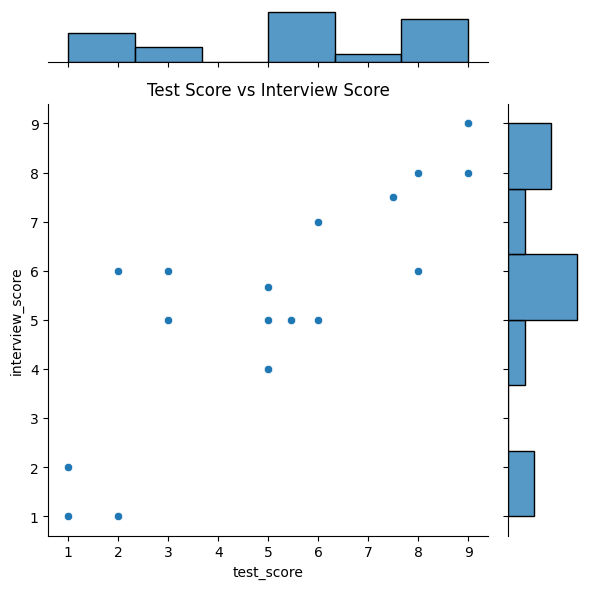

In [ ]:
# Create a joint plot for Test Score vs Interview Score
sns.jointplot(x=data['test_score'], y=data['interview_score'], kind='scatter')
plt.title('Test Score vs Interview Score')
plt.tight_layout()  # Adjust the layout for complete title
plt.show()

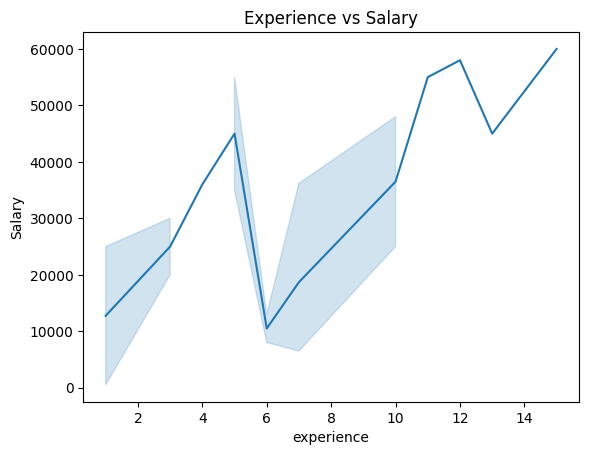

In [ ]:
# Create a line plot for Experience vs Salary
sns.lineplot(x=data['experience'], y=data['Salary'])
plt.title('Experience vs Salary')
plt.show()

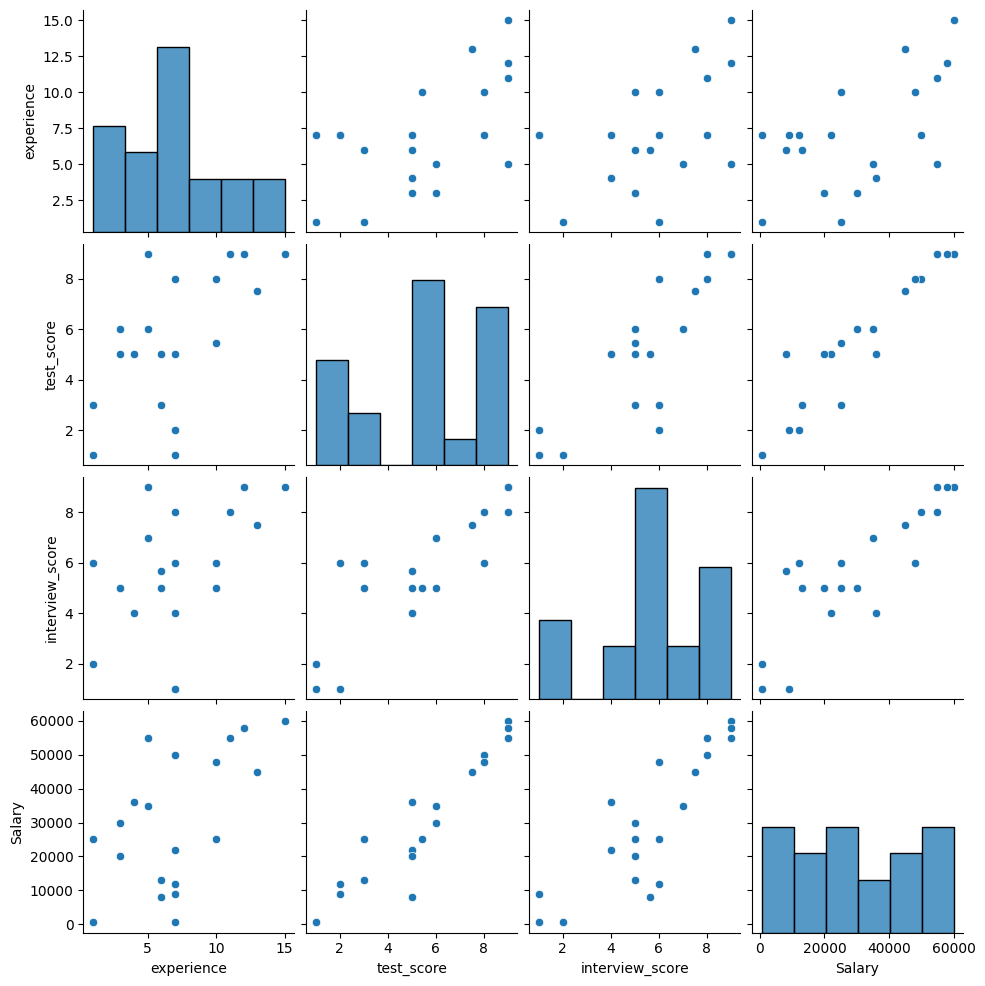

In [ ]:
# Create a pair plot
sns.pairplot(data)
plt.show()

### Define Features & Traget

In [ ]:
# Features are the input variables that help us predict the target
# In this case, 'Experience', 'Test Score', and 'Interview Score' are the features
features = data.drop(columns=['Salary'], axis=1)

# Target is what we're trying to predict
# In this case, 'Salary' is the target
target = data['Salary']

### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Model Training

LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(features_train, target_train)

LinearRegression()

RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
random_forest_model = RandomForestRegressor()

# Train the model using the training data
random_forest_model.fit(features_train, target_train)

RandomForestRegressor()

### Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions using the Linear Regression model
linear_predictions = linear_model.predict(features_test)

# Calculate MAE for Linear Regression model's predictions
linear_mae = mean_absolute_error(target_test, linear_predictions)

# Calculate MSE for Linear Regression model's predictions
linear_mse = mean_squared_error(target_test, linear_predictions)

# Calculate R2 score for Linear Regression model's predictions
linear_r2 = r2_score(target_test, linear_predictions)

# Print the evaluation metrics for Linear Regression
print("Linear Regression:")
print("  Mean Absolute Error:", linear_mae)
print("  Mean Squared Error:", linear_mse)
print("  R2 Score:", linear_r2)

Linear Regression:
  Mean Absolute Error: 2249.6111492147056
  Mean Squared Error: 6402944.506927436
  R2 Score: 0.9806374764485278


In [ ]:
# Make predictions using the Random Forest Regression model
random_forest_predictions = random_forest_model.predict(features_test)

# Calculate MAE for Random Forest Regression model's predictions
random_forest_mae = mean_absolute_error(target_test, random_forest_predictions)

# Calculate MSE for Random Forest Regression model's predictions
random_forest_mse = mean_squared_error(target_test, random_forest_predictions)

# Calculate R2 score for Random Forest Regression model's predictions
random_forest_r2 = r2_score(target_test, random_forest_predictions)

# Print the evaluation metrics for Random Forest Regression
print("Random Forest Regression:")
print("  Mean Absolute Error:", random_forest_mae)
print("  Mean Squared Error:", random_forest_mse)
print("  R2 Score:", random_forest_r2)

Random Forest Regression:
  Mean Absolute Error: 2617.5
  Mean Squared Error: 8598125.0
  R2 Score: 0.973999243999244


### Prediction

In [ ]:
# Define the features for prediction
new_experience = 4  # Replace with the desired experience value
new_test_score = 7  # Replace with the desired test score value
new_interview_score = 8  # Replace with the desired interview score value

# Create a dictionary with the new data
new_data = {'experience': new_experience,
            'test_score': new_test_score,
            'interview_score': new_interview_score}

# Create a DataFrame from the dictionary
new_data_df = pd.DataFrame([new_data])

# Use the trained Linear Regression model to make predictions
predicted_salary = linear_model.predict(new_data_df)

print("Predicted Salary:", round(predicted_salary[0]))

Predicted Salary: 41335
